#Círculo

In [71]:
from pybrain.tools.shortcuts import buildNetwork 
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
dia = csv.excel()
df = pd.read_csv("circle.csv")


In [73]:
 X,Y = df[['X','Y']],df[['T']]

In [ ]:
error= [0 for k in range (6)]
ds= SupervisedDataSet(2, 1)
ds.setField('input', X)
ds.setField('target', Y) 

for j in range(1,7):
    net = buildNetwork(2, j, 1)
      
    trainer = BackpropTrainer(net, ds) 
    for i in range(300):
        error[j-1]=trainer.train()

#Error vs No. HN

In [ ]:
complejidad=[i for i in range(1,7)]
plt.scatter(complejidad,error)

#Gráfica del Círculo

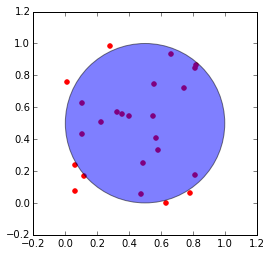

In [59]:
import pylab
plt.scatter(df[['X']],df[['Y']],color='red')
axes = pylab.axes()
circle1 = pylab.Circle((0.5,0.5), radius=0.5, alpha=.5)

axes.add_patch(circle1)

pylab.axis('scaled')
pylab.show()


#Matriz de Confusión  

In [ ]:
import numpy as np
t_pred=[round(net.activate(np.asarray(X)[i])) for i in range(len(X))]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.asarray(Y),t_pred)
                    

#ROC

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

actual = np.asarray(Y)
predictions =[net.activate(np.asarray(X)[i]) for i in range(len(X))]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

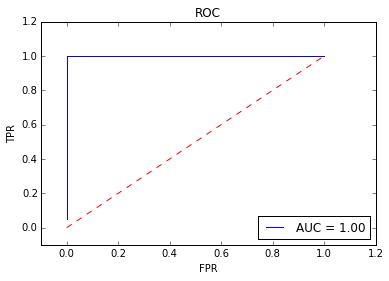

In [63]:
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [64]:
roc_auc

1.0

#Ejercicio ROC

In [12]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import random
dia = csv.excel()
df = pd.read_csv("EjercicioROC.csv")
predictions,actual = df[['Calificacion']],df[['Categoria Real (1=Fraude, 0=NoFraude)']]

In [13]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

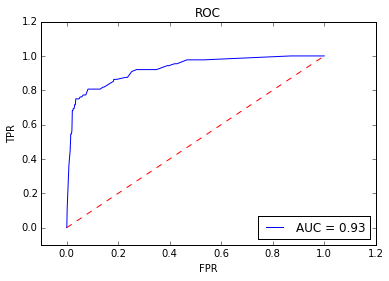

In [14]:
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [15]:
import numpy as np
predictions=[round(np.asarray(df[['Calificacion']])[i]) for i in range(len(np.asarray(df[['Calificacion']])))]

In [16]:
confusion_matrix(actual,predictions)

array([[10028,     0],
       [   88,     0]])

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(actual,predictions)

0.5

# SVM

In [61]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

In [62]:
dia = csv.excel()
df = pd.read_csv("circle.csv")
X,actual = df[['X','Y']],df[['T']]

In [63]:
clf = SVC(C=10,kernel='rbf')
clf.fit(X, actual) 

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [64]:
clf.support_vectors_

array([[ 0.54734818,  0.91033737],
       [ 0.76419851,  0.64693395],
       [ 0.88832861,  0.50680447],
       [ 0.84714824,  0.56561148],
       [ 0.99378636,  0.38114245],
       [ 0.91781604,  0.41731483],
       [ 0.5754396 ,  0.88188902],
       [ 0.98703168,  0.25268553],
       [ 0.9362941 ,  0.47928296],
       [ 0.82777496,  0.58278715],
       [ 0.7099503 ,  0.72116092],
       [ 0.5307481 ,  0.85457681],
       [ 0.43039641,  0.95454702],
       [ 0.67700638,  0.73818837],
       [ 0.41211218,  0.96007409],
       [ 0.96990675,  0.40204529],
       [ 0.75977522,  0.7137949 ],
       [ 0.34805154,  0.99511213],
       [ 0.58930549,  0.87548302],
       [ 0.93341296,  0.41853176],
       [ 0.25279508,  0.99255019],
       [ 0.58477572,  0.84915752],
       [ 0.96053471,  0.38036953],
       [ 0.13980329,  0.99280114],
       [ 0.96399844,  0.28501539],
       [ 0.58352735,  0.86131029],
       [ 0.24314579,  0.99891842],
       [ 0.96541451,  0.34433358],
       [ 0.53943543,

In [65]:
import numpy as np
t_pred=[round(clf.predict(np.asarray(X)[i])) for i in range(len(X))]

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.asarray(actual),t_pred)
                    

array([[120,   7],
       [  3, 476]])

In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

actual = np.asarray(actual)
predictions =[clf.predict(np.asarray(X)[i]) for i in range(len(X))]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

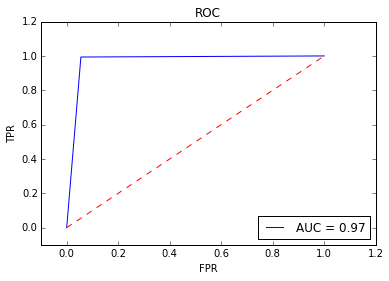

In [70]:
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()